In [65]:
from copy import deepcopy
import csv
import sys
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import matplotlib.ticker as mtick
#matplotlib.use('Agg')
matplotlib.rc('font', family='DejaVu Sans', stretch="condensed")

## PoliGraph Analysis

In [66]:
from copy import deepcopy
import csv
import sys
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import matplotlib.ticker as mtick
#matplotlib.use('Agg')
matplotlib.rc('font', family='DejaVu Sans', stretch="condensed")

In [67]:
df = pd.read_csv("stats/edge_stats.csv")

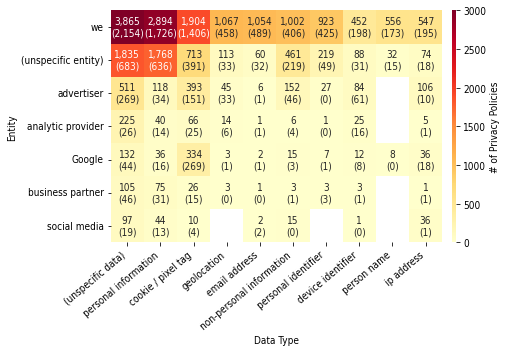

In [68]:
top_entities = [
    "we",
    "UNSPECIFIC_ACTOR",
    "advertiser",
    "analytic provider",
    "Google",
    "business partner",
    "social media",
]

top_datatypes = [
    "UNSPECIFIC_DATA",
    "personal information",
    "cookie / pixel tag",
    "geolocation",
    "email address",
    "non-personal information",
    "personal identifier",
    "device identifier",
    "person name",
    "ip address",
]

fontsize = 'medium'

tmp_df = df[df.u.isin(top_entities) & df.v.isin(top_datatypes) & (df.rel == "COLLECT")]
pv_table = pd.pivot_table(tmp_df, values="count", index="u", columns="v")
pv_table = pv_table.loc[top_entities, top_datatypes]
pv_table_purpose = pd.pivot_table(tmp_df, values="purpose_count", index="u", columns="v")
pv_table_purpose = pv_table_purpose.loc[top_entities, top_datatypes]

fig = plt.figure(figsize=(8, 5.0))

labels = pv_table.fillna(0).applymap(lambda x: ("{:,}".format(int(x))))
labels = labels + "\n" + pv_table_purpose.fillna(0).applymap(lambda x: ("({:,})".format(int(x))))

ax = sns.heatmap(pv_table, cmap='YlOrRd', annot=labels, square=True, vmin=0, vmax=3000,
    annot_kws={'size': "medium"},
    cbar_kws={'shrink': 1.0, 'aspect': 50, 'pad': 0.02}, fmt="")

colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.ax.set_ylabel('# of Privacy Policies', size=fontsize)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size=fontsize)

x_ticks = []
for tick in ax.xaxis.get_major_ticks():
    if tick.label.get_text() == "UNSPECIFIC_DATA":
        x_ticks.append('(unspecific data)')
    else:
        x_ticks.append(tick.label.get_text())
ax.set_xticklabels(x_ticks)

y_ticks = []
for tick in ax.yaxis.get_major_ticks():
    if tick.label.get_text() == "UNSPECIFIC_ACTOR":
        y_ticks.append('(unspecific entity)')
    else:
        y_ticks.append(tick.label.get_text())
ax.set_yticklabels(y_ticks)

ax.set_xlabel("Data Type")
ax.set_ylabel("Entity")
fig.set_tight_layout(True)
fig.savefig("figs/collect-edge-heatmap.pdf")

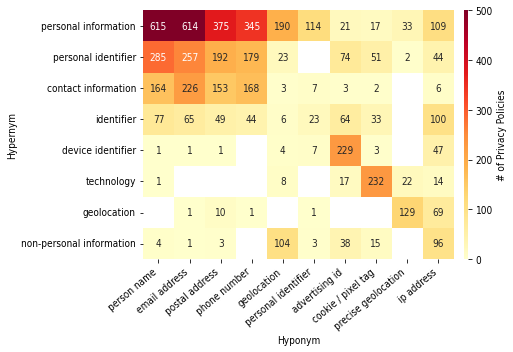

In [69]:
top_upper = [
    "personal information",
    "personal identifier",
    "contact information",
    "identifier",
    "device identifier",
    "technology",
    "geolocation",
    "non-personal information",
]

top_lower = [
    "person name",
    "email address",
    "postal address",
    "phone number",
    "geolocation",
    "personal identifier",
    "advertising id",
    "cookie / pixel tag",
    "precise geolocation",
    "ip address",
]

fontsize = 'medium'

tmp_df = df[df.u.isin(top_upper) & df.v.isin(top_lower) & (df.rel == "SUBSUM")]
pv_table = pd.pivot_table(tmp_df, values="count", index="u", columns="v")
pv_table = pv_table.loc[top_upper, top_lower]
fig = plt.figure(figsize=(8, 5.0))
labels = pv_table.fillna(0).applymap(lambda x: ("{:,}".format(int(x))))
ax = sns.heatmap(pv_table, cmap='YlOrRd', annot=labels, square=True, vmin=0, vmax=500,
    annot_kws={'size': "medium"},
    cbar_kws={'shrink': 1.0, 'aspect': 50, 'pad': 0.02}, fmt="")

colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.ax.set_ylabel('# of Privacy Policies', size=fontsize)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size=fontsize)

ax.set_xlabel("Hyponym")
ax.set_ylabel("Hypernym")
fig.set_tight_layout(True)
fig.savefig("figs/subsum-edge-heatmap.pdf")

## Inferences

In [70]:
entity_order = ["advertiser", "analytic provider", "social media", "content provider", "auth provider", "email service provider", "(unspecific entity)"]
datatype_order = ["software identifier", "hardware identifier", "geolocation", "contact information", "protected classification", "government identifier",  "biometric information", "internet activity", "(unspecific data)"]

entity_stats = pd.read_csv("stats/entity_stats.csv", index_col=0)
entity_stats.rename(columns={'UNSPECIFIC_ACTOR': '(unspecific entity)'}, index={'UNSPECIFIC_DATA': '(unspecific data)'}, inplace=True)
total_collection = entity_stats["total"]

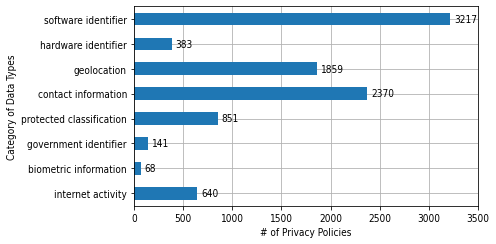

In [71]:
fig = plt.figure(figsize=(7, 3.5))
ax = total_collection.loc[datatype_order[::-1]].drop("(unspecific data)").plot.barh()
ax.bar_label(ax.containers[0], padding = 4)

ax.set_xlim(0, 3500)
ax.set_axisbelow(True)
ax.grid()
ax.set_xlabel("# of Privacy Policies")
ax.set_ylabel("Category of Data Types")
fig.set_tight_layout(True)
fig.savefig("figs/stat_collection.pdf")

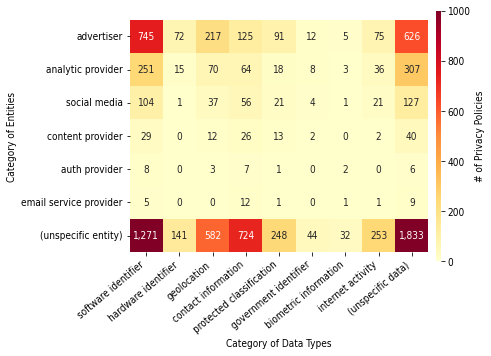

In [72]:
#ext_entity_stats = pd.read_csv("stats/ext_entity_stats.csv", index_col=0)
#ext_entity_stats.rename(columns={'UNSPECIFIC_ACTOR': '(unspecific entity)'}, index={'UNSPECIFIC_DATA': '(unspecific data)'}, inplace=True)
#ext_entity_stats = ext_entity_stats.loc[datatype_order, entity_order]

tmp_df = entity_stats.loc[datatype_order, entity_order].T.copy()
#tmp_df2 = ext_entity_stats.copy()

labels = tmp_df.applymap(lambda x: ("{:,}".format(int(x))))
#labels = labels + "\n" + tmp_df2.applymap(lambda x: ("({:,})".format(int(x))))

fig = plt.figure(figsize=(7, 7))
ax = sns.heatmap(tmp_df, cmap='YlOrRd', annot=labels, square=True, annot_kws={'size': "medium"},
                 vmin=0.0, vmax=1000,
                 cbar_kws={'shrink': 0.52, 'aspect': 50, 'pad': 0.02}, fmt="")

colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.ax.set_ylabel('# of Privacy Policies', size=fontsize)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size=fontsize)

ax.set_ylabel("Category of Entities")
ax.set_xlabel("Category of Data Types")
fig.set_tight_layout(True)
fig.savefig("figs/data-sharing-heatmap.pdf")

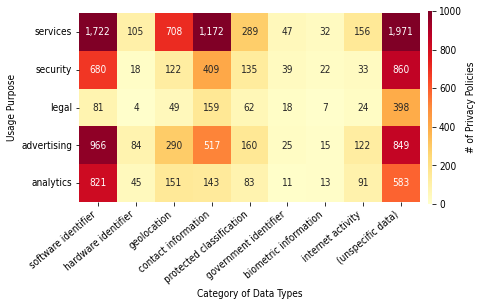

In [73]:
purpose_stats = pd.read_csv("stats/purpose_stats.csv", index_col=0)
purpose_stats.rename(columns={'UNSPECIFIC_ACTOR': '(unspecific entity)'}, index={'UNSPECIFIC_DATA': '(unspecific data)'}, inplace=True)
#ext_purpose_stats = pd.read_csv("stats/ext_purpose_stats.csv", index_col=0)
#ext_purpose_stats.rename(columns={'UNSPECIFIC_ACTOR': '(unspecific entity)'}, index={'UNSPECIFIC_DATA': '(unspecific data)'}, inplace=True)

tmp_df = purpose_stats.loc[datatype_order, :].T
#tmp_df2 = ext_purpose_stats.loc[datatype_order, :]

labels = tmp_df.applymap(lambda x: ("{:,}".format(int(x))))
#labels = labels + "\n" + tmp_df2.applymap(lambda x: ("({:,})".format(int(x))))

fig = plt.figure(figsize=(7, 7))
ax = sns.heatmap(tmp_df, cmap='YlOrRd', annot=labels, square=True, annot_kws={'size': "medium"},
                 vmin=0.0, vmax=1000.0,
                 cbar_kws={'shrink': 0.4, 'aspect': 50, 'pad': 0.02}, fmt="")

colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.ax.set_ylabel('# of Privacy Policies', size=fontsize)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size=fontsize)

ax.set_ylabel("Usage Purpose")
ax.set_xlabel("Category of Data Types")
fig.set_tight_layout(True)

fig.savefig("figs/data-purpose-heatmap.pdf")

In [80]:
app_nums = pd.read_csv("stats/app_num_stats.csv", index_col=0)
app_nums.rename({"UNSPECIFIC_DATA": "(unspecific data)"}, inplace=True)
app_nums["total_collection"] = total_collection

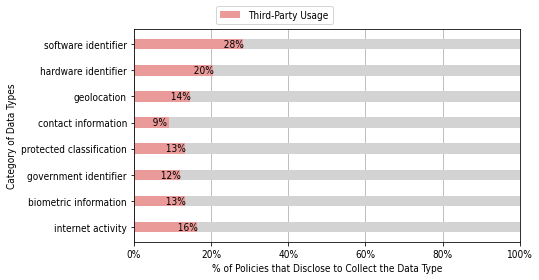

In [84]:
bar_width = 0.4

df = app_nums.loc[datatype_order[::-1]].drop("(unspecific data)")
labels = df.index
#arr1 = df["ext_bad_sharing"] / df["total_collection"]
arr2 = df["sharing"] / df["total_collection"]

fig, ax = plt.subplots(figsize=(7.6, 4))
ax.barh(labels, 1, bar_width, color=["lightgray"])
#bars = ax.barh(labels, arr1, bar_width, color=['#ffe59a'], label="from ExtPoliGraph")
#ax.bar_label(bars, labels=[f"{100 * n:4.0f}%" for n in arr1], padding=-25)
bars = ax.barh(labels, arr2, bar_width, color=['#e99a99'], label="Third-Party Usage")
ax.bar_label(bars, labels=[f"{100 * n:4.0f}%" for n in arr2], padding=-25)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_xlim(0.0, 1.0)
ax.set_ylabel("Category of Data Types")
ax.set_xlabel("% of Policies that Disclose to Collect the Data Type")
ax.set_axisbelow(True)
ax.grid()
ax.legend(bbox_to_anchor=(0.2, 1.00), ncol=2)
fig.set_tight_layout(True)
fig.savefig("figs/stat_sharing.pdf")

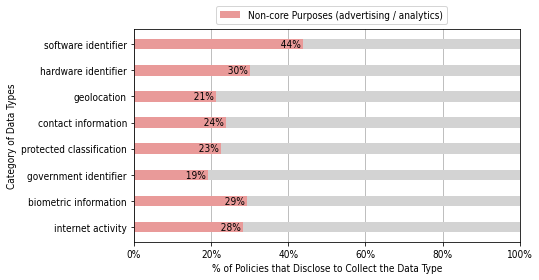

In [62]:
bar_width = 0.4

df = app_nums.loc[datatype_order[::-1]].drop("(unspecific data)")
labels = df.index
arr1 = df["ext_non_core_purpose"] / df["total_collection"]
arr2 = df["non_core_purpose"] / df["total_collection"]

fig, ax = plt.subplots(figsize=(7.6, 4))
ax.barh(labels, 1, bar_width, color=["lightgray"])
#bars = ax.barh(labels, arr1, bar_width, color=['#ffe59a'], label="from ExtPoliGraph")
#ax.bar_label(bars, labels=[f"{100 * n:4.0f}%" for n in arr1], padding=-25)
bars = ax.barh(labels, arr2, bar_width, color=['#e99a99'], label="Non-core Purposes (advertising / analytics)")
ax.bar_label(bars, labels=[f"{100 * n:4.0f}%" for n in arr2], padding=-28)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_xlim(0.0, 1.0)
ax.set_ylabel("Category of Data Types")
ax.set_xlabel("% of Policies that Disclose to Collect the Data Type")
ax.set_axisbelow(True)
ax.grid()
ax.legend(bbox_to_anchor=(0.2, 1.00), ncol=2)
fig.set_tight_layout(True)
fig.savefig("figs/stat_purpose.pdf")